**Homeworks – Optimization, 2021/22. semester I.**

*Week 2*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

# Ex1

## Problem

Consider the following integer programming problem.

\begin{align*}
x_1 + 2x_2 &\rightarrow \text{max} \\
-3x_1  + 4x_2 &\leq 4 \\
3x_1 + 2x_2 &\leq 11 \\
2x_1 - x_2 &\leq 5 \\
x_1, x_2 &\geq 0 \\
x_1, x_2 &\text{integer}
\end{align*}

Use a figure to asnwer the following questions.
- What is the optimal cost of the linear programming relaxation? What is the optimal cost of the integer programming problem? (1pt)
- What is the convex hull of the set of all solutions to the integer programming problem? (1pt)

## Solution

### a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

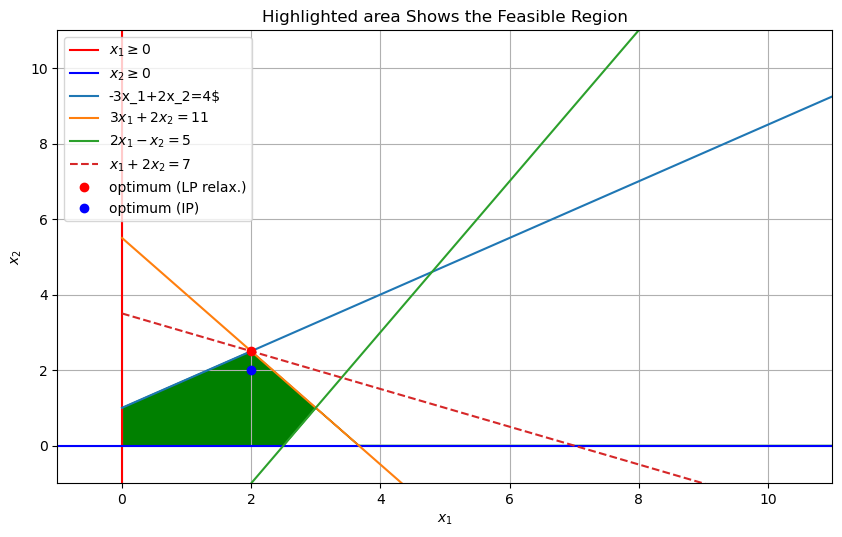

In [33]:
# Plot settings
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.grid(True)
plt.xlim((-1, 11))
plt.ylim((-1, 11))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

x_1 = np.linspace(0, 30, 1000)

# Draw constraints
plt.axvline(0, color='red', label=r'$x_1 \geq 0$') # constraint 1
plt.axhline(0, color='blue', label=r'$x_2 \geq 0$')  # constraint 2
plt.plot(x_1, 1+3/4*x_1,
         label=r'-3x_1+2x_2=4$') # constraint 3
plt.plot(x_1, 11/2 - (3/2*x_1),
         label=r'$3x_1 + 2x_2 = 11$') # constraint 4
plt.plot(x_1, -5 + (2*x_1),
         label=r'$2x_1 -x_2 = 5$') # constraint 5

# Draw solution
plt.plot(x_1, -x_1/2 + 7/2,
        label=r'$x_1 + 2x_2 = 7$',
        linestyle='--')
plt.plot(2, 5/2, 'ro', label='optimum (LP relax.)')
plt.plot(2, 2, 'bo', label='optimum (IP)')

# highlight feasible area
plt.title('Highlighted area Shows the Feasible Region')
plt.fill_between(x_1,
                 np.maximum(0,np.minimum(11/2-3/2*x_1,1+3/4*x_1)),
                 np.maximum(0,np.minimum(-5 + (2*x_1),11/2 - (3/2*x_1))),
                 color='green')
plt.legend()
plt.show()

The optimal cost of the linear programming relaxation is $7$, $(x_1=2,x_2=\frac{5}{2})$.

The optimal cost of the integer programming problem is $6$, $(x_1=2,x_2=2)$.

### b)

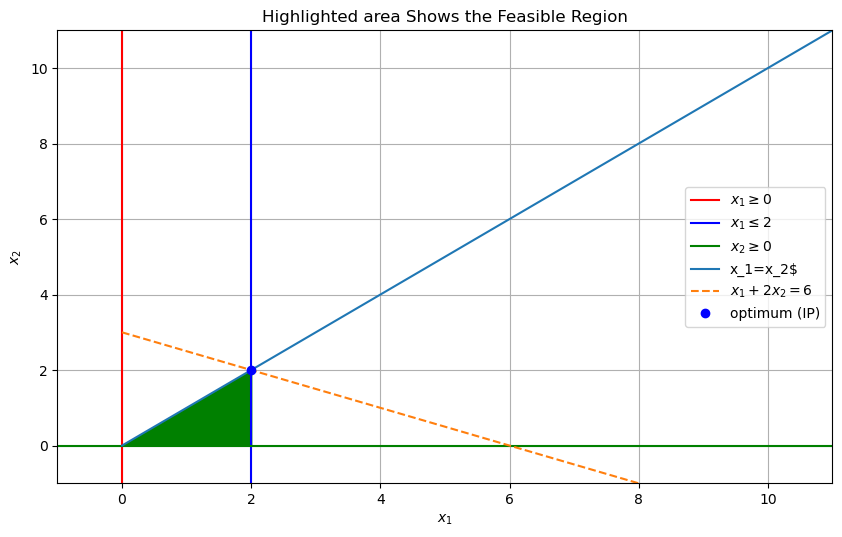

In [58]:
# Plot settings
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.grid(True)
plt.xlim((-1, 11))
plt.ylim((-1, 11))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

x_1 = np.linspace(0, 30, 1000)

# Draw constraints
plt.axvline(0, color='red', label=r'$x_1 \geq 0$') # constraint 1
plt.axvline(2, color='blue', label=r'$x_1 \leq 2$') # constraint 1
plt.axhline(0, color='green', label=r'$x_2 \geq 0$')  # constraint 3
plt.plot(x_1, x_1,
         label=r'x_1=x_2$') # constraint 3

# Draw solution
plt.plot(x_1, -x_1/2 + 6/2,
        label=r'$x_1 + 2x_2 = 6$',
        linestyle='--')
plt.plot(2, 2, 'bo', label='optimum (IP)')

# highlight feasible area
plt.title('Highlighted area Shows the Feasible Region')
plt.fill_between([0,2,2,0], [0, 2, 0, 0], color='green')

plt.legend()
plt.show()

The convex hull of the set of all solutions to the integer programming problem:

\begin{align*}
x_1  &\leq 2 \\
x_2 &\leq x_1 \\
x_1, x_2 &\geq 0 \\
x_1, x_2 &\text{integer}
\end{align*}

# Ex2

## Problem

A company is manufacturing k different products using $m$ resources. The amounts of available resources are given, together with the requirement of each of them for the different products. The selling price of the products are also known.

- Write up an IP model that aims at maximizing the total profit. (1pt)
- Adjust the model if starting the production of product i requires a cost of $s_i$. (1pt)

## Solution

### a)

\begin{align*}
\max cx \\
Ax &\leq b \\
x &\geq 0 \\
x \in  & \mathbb{Z}
\end{align*}

where
- $x_i$ denotes product $i$ where $i=1,\dots,k$
- $Ax$ represents the requirement of the resources for the products
- $b$ represents the amounts available of the resources
- $cx$ represents the profit acquired using the price vector $c$

### b)

Adjust the model if starting the production of product i requires a cost of  𝑠𝑖 . (1pt)

Introducing an initial cost per product can be expressed as decreasing the price (the net profit):

\begin{align*}
\max (c-s)x \\
Ax &\leq b \\
x &\geq 0 \\
x \in  & \mathbb{Z}
\end{align*}

where
- $s$ represents the initial cost vector